## Project 1: Risky Business (Revisited)

With a [`cudf`](https://docs.rapids.ai/install)-compatible setup now, I wanted to follow-up on the large, labeled datasets from [project 1](./project-1-risky-business.ipynb) that I couldn't look at before. On top of that, `cudf` has an updated [pandas extension](https://rapids.ai/cudf-pandas/) that's easy to add to existing code:

In [1]:
%load_ext cudf.pandas
# ^ moves pandas ops to cudf/GPU when possible
import pandas as pd
import os

subpath = './data/LendingClub_2007_to_2018Q4/'
acc_path = os.path.join(subpath, 'accepted_2007_to_2018Q4.csv')
rej_path = os.path.join(subpath, 'rejected_2007_to_2018Q4.csv')

In [2]:
acc = pd.read_csv(acc_path)
acc

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,...,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN


Wow! 2M rows in under 15s. A huge improvement over stalling out at 6+ mins. Looks like the last 2 rows are summaries that can be dropped.

In [3]:
acc = acc.iloc[:-2, :]
acc

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,NaN,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2260695,88977788,NaN,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0


And now to check out the columns:

In [4]:
acc.columns

StringIndex(['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'fico_range_low'
 'fico_range_high' 'inq_last_6mths' 'mths_since_last_delinq'
 'mths_since_last_record' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee'
 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'last_fico_range_high' 'last_fico_range_low' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open

In [5]:
with pd.option_context('display.max_rows', None):
    display(acc.head().transpose())

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


Apparently the reference for these columns is missing from Lending Club, and this is a lot to figure out by hand, so I'll just make sure these columns match the rejection set, then label each.

In [6]:
rej = pd.read_csv(rej_path)
rej

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0


...okay. That's completely different from the accepted set. 

Or at least it looks that way. With a bit of review most of the `rej` columns map over:

In [7]:
rej_keep_cols = ['Amount Requested', 'Loan Title', 'Risk_Score', 'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length']
acc_keep_cols = ['loan_amnt', 'title', 'fico_range_low', 'dti', 'zip_code', 'addr_state', 'emp_length']

So I'll pull just these columns out of both sets, update them to match, add an extra column as the acceptance label, then join them.

In [8]:
rej = rej.loc[:, rej_keep_cols]
rej

,Amount Requested,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years
1,1000.0,Consolidating Debt,703.0,10%,010xx,MA,< 1 year
2,11000.0,Want to consolidate my debt,715.0,10%,212xx,MD,1 year
3,6000.0,waksman,698.0,38.64%,017xx,MA,< 1 year
4,1500.0,mdrigo,509.0,9.43%,209xx,MD,< 1 year
...,...,...,...,...,...,...,...
27648736,10000.0,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year
27648737,10000.0,moving,NaN,1.48%,207xx,MD,5 years
27648738,1200.0,Other,686.0,10.26%,914xx,CA,< 1 year
27648739,25000.0,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year


In [9]:
acc = acc.loc[:, acc_keep_cols]
acc['accepted'] = 1 # True
acc

,loan_amnt,title,fico_range_low,dti,zip_code,addr_state,emp_length,accepted
0,3600.0,Debt consolidation,675.0,5.91,190xx,PA,10+ years,1
1,24700.0,Business,715.0,16.06,577xx,SD,10+ years,1
2,20000.0,None,695.0,10.78,605xx,IL,10+ years,1
3,35000.0,Debt consolidation,785.0,17.06,076xx,NJ,10+ years,1
4,10400.0,Major purchase,695.0,25.37,174xx,PA,3 years,1
...,...,...,...,...,...,...,...,...
2260694,24000.0,Home improvement,665.0,19.61,356xx,AL,7 years,1
2260695,24000.0,Debt consolidation,695.0,34.94,840xx,UT,10+ years,1
2260696,40000.0,None,705.0,12.75,907xx,CA,9 years,1
2260697,24000.0,Debt consolidation,660.0,18.30,334xx,FL,6 years,1


In [10]:
rej.columns = acc_keep_cols
rej['accepted'] = 0 # False
rej

,loan_amnt,title,fico_range_low,dti,zip_code,addr_state,emp_length,accepted
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0
...,...,...,...,...,...,...,...,...
27648736,10000.0,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0
27648737,10000.0,moving,NaN,1.48%,207xx,MD,5 years,0
27648738,1200.0,Other,686.0,10.26%,914xx,CA,< 1 year,0
27648739,25000.0,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0


In [11]:
data = pd.concat([acc, rej])
data

,loan_amnt,title,fico_range_low,dti,zip_code,addr_state,emp_length,accepted
0,3600.0,Debt consolidation,675.0,5.91,190xx,PA,10+ years,1
1,24700.0,Business,715.0,16.06,577xx,SD,10+ years,1
2,20000.0,None,695.0,10.78,605xx,IL,10+ years,1
3,35000.0,Debt consolidation,785.0,17.06,076xx,NJ,10+ years,1
4,10400.0,Major purchase,695.0,25.37,174xx,PA,3 years,1
...,...,...,...,...,...,...,...,...
27648736,10000.0,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0
27648737,10000.0,moving,NaN,1.48%,207xx,MD,5 years,0
27648738,1200.0,Other,686.0,10.26%,914xx,CA,< 1 year,0
27648739,25000.0,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0


In [12]:
# sanity check
assert len(data) == len(acc) + len(rej)

In [13]:
# formatting cleanup
data['dti'] = data['dti'].apply(lambda x: float(str(x).split('%')[0]))
data['emp_length'] = data['emp_length'].apply(lambda x: str(x).split('year')[0].strip()) # this will be categorical
data

,loan_amnt,title,fico_range_low,dti,zip_code,addr_state,emp_length,accepted
0,3600.0,Debt consolidation,675.0,5.91,190xx,PA,10+,1
1,24700.0,Business,715.0,16.06,577xx,SD,10+,1
2,20000.0,None,695.0,10.78,605xx,IL,10+,1
3,35000.0,Debt consolidation,785.0,17.06,076xx,NJ,10+,1
4,10400.0,Major purchase,695.0,25.37,174xx,PA,3,1
...,...,...,...,...,...,...,...,...
27648736,10000.0,Debt consolidation,590.0,41.26,441xx,OH,< 1,0
27648737,10000.0,moving,NaN,1.48,207xx,MD,5,0
27648738,1200.0,Other,686.0,10.26,914xx,CA,< 1,0
27648739,25000.0,debt_consolidation,NaN,17.71,880xx,NM,< 1,0


In [14]:
data.dtypes

loan_amnt         float64
title              object
fico_range_low    float64
dti               float64
zip_code           object
addr_state         object
emp_length         object
accepted            int64
dtype: object

Great. Now let's run it through a slightly modified version of `preprocess_classifier`:

In [16]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_classifier(data:pd.DataFrame, Y_column:str, **kwargs) -> tuple[pd.DataFrame, pd.DataFrame]:
    
    y = data[Y_column]
    data = data.drop([Y_column], axis=1)

    # apply config
    null_threshold = 0.8 * len(data)
    unique_threshold = len(data)
    for kw in kwargs:
        match kw:
            case 'null_tolerance': null_threshold = kwargs[kw] * len(data)
            case 'null_threshold': null_threshold = kwargs[kw]
            case 'unique_tolerance': unique_threshold = kwargs[kw] * len(data)
            case 'unique_threshold': unique_threshold = kwargs[kw]
            case 'drop_columns': data.drop(kwargs[kw], axis=1, inplace=True)
            case 'keep_columns': 
                drop = set(data.columns) - set(kwargs[kw])
                data.drop(list(drop), axis=1, inplace=True)
    
    # filter data based on config
    object_columns = set()
    bool_columns = set()
    numeric_columns = set()
    for column in data:
        if data[column].isnull().sum() >= null_threshold or data[column].nunique() >= unique_threshold: # or column == Y_column:
            print(f'Exluding column {column}.')
            continue
        match data.dtypes[column]:
            case 'O' | 'object': # date columns, which we want to filter, may be brought in as object
                try: pd.to_datetime(data[column]) # we can test for them by attempting to convert
                except (pd.errors.ParserError, ValueError): object_columns.add(column)
            case 'bool': bool_columns.add(column)
            case 'int64' | 'float64': numeric_columns.add(column)
    
    # split data by dtype
    object_data = data[list(object_columns)]
    bool_data = data[list(bool_columns)]
    numeric_data = data[list(numeric_columns)]
    data = []

    # categorical (object, bool)
    for categorical_data in [object_data, bool_data]:
        labels = LabelEncoder().fit_transform(categorical_data.values.reshape(-1))
        n_rows = len(categorical_data)
        n_columns = int(labels.shape[0] / n_rows)
        data.append(pd.DataFrame(labels.reshape(n_rows, n_columns), columns=categorical_data.columns))

    # numeric (int, float)
    median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    median_imputer.fit(numeric_data)
    imputed_data = pd.DataFrame(median_imputer.transform(numeric_data), columns=numeric_data.columns)
    normalized_data = (imputed_data - imputed_data.mean(axis=0)) / imputed_data.std(axis=0)
    data.append(normalized_data)

    # zip it up, and zip it out
    return pd.concat(data, axis=1), y


In [17]:
X, y = preprocess_classifier(data, 'accepted')

In [18]:
X

,title,addr_state,zip_code,emp_length,fico_range_low,loan_amnt,dti
0,29009,68200,1527,1242,0.462889,-0.660179,-0.012634
1,10863,81477,3759,1242,1.206076,0.779162,-0.011632
2,128179,48189,3843,1242,0.834483,0.458551,-0.012153
3,29009,62944,1110,1242,2.506654,1.481779,-0.011533
4,57667,68200,1487,2952,0.834483,-0.196315,-0.010713
...,...,...,...,...,...,...,...
29909435,29009,66763,3483,4437,-1.116384,-0.223601,-0.009145
29909436,115136,57037,2632,3589,0.091295,-0.223601,-0.013071
29909437,67827,12275,4319,4437,0.667265,-0.823895,-0.012204
29909438,104137,62950,4261,4437,0.091295,0.799627,-0.011469


In [19]:
y

0           1
1           1
2           1
3           1
4           1
           ..
27648736    0
27648737    0
27648738    0
27648739    0
27648740    0
Name: accepted, Length: 29909440, dtype: int64

And now to bring `run_classifier` back into the mix:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from joblib import parallel_backend # https://stackoverflow.com/a/67548288

def run_classifier(X_data:pd.DataFrame, Y_data:pd.DataFrame, search_kwargs:dict) -> pd.DataFrame:
    with parallel_backend('threading'): # https://joblib.readthedocs.io/en/latest/parallel.html#thread-based-parallelism-vs-process-based-parallelism
        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)
        dec_tree = DecisionTreeClassifier(random_state=4)
        grid_search = GridSearchCV(dec_tree, **search_kwargs) 
        grid_search.fit(X_train, Y_train)
        predictions = grid_search.predict(X_test)
        importance = pd.DataFrame(pd.array(grid_search.best_estimator_.feature_importances_), index=X_train.columns)
    failure_rate, success_rate, _ = metrics.roc_curve(Y_test, predictions)
    auc_score = metrics.auc(failure_rate, success_rate)
    plt.plot(failure_rate, success_rate, label=f'AUC Score: {auc_score}')
    plt.legend(loc=4)
    plt.show()

    return importance

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 2/2] END criterion=entropy, max_depth=20, min_samples_split=50;, score=0.986 total time= 4.1min
[CV 2/2] END criterion=gini, max_depth=21, min_samples_split=51;, score=0.986 total time= 4.1min
[CV 2/2] END criterion=gini, max_depth=21, min_samples_split=50;, score=0.986 total time= 4.1min
[CV 1/2] END criterion=entropy, max_depth=20, min_samples_split=51;, score=0.986 total time= 4.1min
[CV 2/2] END criterion=entropy, max_depth=20, min_samples_split=51;, score=0.986 total time= 4.2min
[CV 2/2] END criterion=entropy, max_depth=21, min_samples_split=51;, score=0.986 total time= 4.2min
[CV 1/2] END criterion=entropy, max_depth=20, min_samples_split=50;, score=0.986 total time= 4.2min
[CV 1/2] END criterion=entropy, max_depth=21, min_samples_split=51;, score=0.986 total time= 4.2min
[CV 1/2] END criterion=gini, max_depth=20, min_samples_split=51;, score=0.986 total time= 4.2min
[CV 2/2] END criterion=entropy, max_depth=21, min

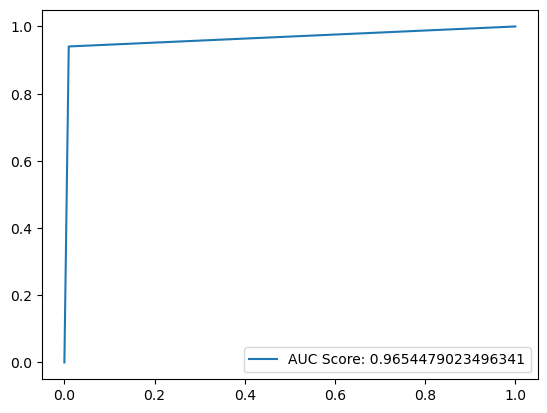

In [27]:
params = { 'criterion' : ['gini', 'entropy'], 'max_depth' : [20, 21], 'min_samples_split' : [50, 51] }
kwargs = dict(param_grid=params, n_jobs=-1, verbose=4, cv=2, refit='best_params_') # n_jobs = -1 -> use all processors

importance = run_classifier(X, y, search_kwargs=kwargs) 

In [28]:
importance.sort_values(0)

,0
addr_state,0.000433
zip_code,0.000871
loan_amnt,0.005783
dti,0.013306
title,0.057407
emp_length,0.230503
fico_range_low,0.691697


Considering how this stacks up to the original results, I'd say an improvement. There's a strong correlation for `fico_range_low`, but given how the FICO score is used, it makes sense as a strong loan predictor. I expected `addr_state` and `zip_code` to show some regional bias, but what surprised me most was that `dti` (debt-to-income ratio) wasn't a strong predictor at all.

This is as far as I can go with what I have, but a good follow-up question would be confirming whether the FICO scores are from the time of application, or if they were updated before exporting the data.